<a href="https://colab.research.google.com/github/FurqanBhat/ML-Colab-Notebooks/blob/main/NeuralNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

In [2]:
#LOAD DATA

transform=transforms.Compose([
    transforms.ToTensor()
])

training_dataset=torchvision.datasets.MNIST(root='./data',train=True, transform=transform, download=True)

testing_dataset=torchvision.datasets.MNIST(root='./data', train=False, transform=transform, download=True)


100%|██████████| 9.91M/9.91M [00:00<00:00, 17.8MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 483kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 4.47MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 6.00MB/s]


In [3]:
#Hyperparameters
batch_size=100
learning_rate=0.01
num_epochs=4

#Loaders
training_loader=torch.utils.data.DataLoader(dataset=training_dataset, batch_size=batch_size, shuffle=True)

testing_loader=torch.utils.data.DataLoader(dataset=testing_dataset, batch_size=batch_size, shuffle=False)



In [4]:
#Model
import torch.nn as nn

class NeuralNet(nn.Module):
  def __init__(self):
    super().__init__()
    self.l1=nn.Linear(784,500)
    self.relu=nn.ReLU()
    self.l2=nn.Linear(500,10)

  def forward(self,x):
    out=self.l1(x)
    out=self.relu(out)
    out=self.l2(out)
    return out

In [5]:
device=torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


In [6]:
model=NeuralNet().to(device)
#Loss and Optimizer
criterion=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(model.parameters(), lr=learning_rate)

In [7]:
#Train
batch_size=len(training_loader)
for epoch in range(num_epochs):
  running_loss=0
  for images, labels in training_loader:
    images=images.reshape(-1, 784).to(device)
    labels=labels.to(device)

    outputs=model(images)



    loss=criterion(outputs, labels)
    loss.backward()
    running_loss+=loss.item()

    optimizer.step()
    optimizer.zero_grad()

  print(f"Epoch [{epoch+1}/{num_epochs}], loss: {running_loss/batch_size}")


Epoch [0/4], loss: 0.2108343902043998
Epoch [1/4], loss: 0.11803128921426832
Epoch [2/4], loss: 0.09395676266246786
Epoch [3/4], loss: 0.07986200125499938


In [46]:
#Test
n_correct=0
total_test_size=len(training_loader.dataset)
with torch.no_grad():
  for images, labels in training_loader:
    images=images.reshape(-1,28*28).to(device)
    labels=labels.to(device)

    outputs=model(images)
    _,predictions=torch.max(outputs,1)

    n_correct+=(predictions==labels).sum().item()

print(f"Accuracy: {(n_correct/total_test_size)*100:.5f}%")

Accuracy: 98.23667%


tensor([0], device='cuda:0')


Text(0.5, 0, 'Predicted: 0 \nActual: 0')

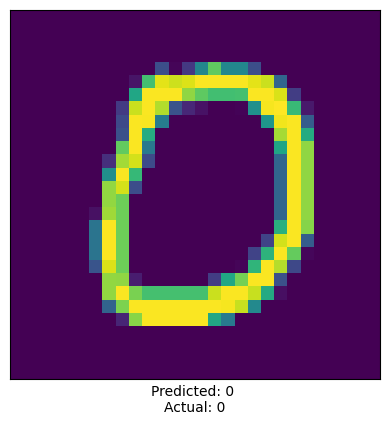

In [49]:
#Random test and plotting
import matplotlib.pyplot as plt
example_data, example_targets=next(iter(testing_loader))

x=10
image = example_data[x]
plt.imshow(image[0])
label = example_targets[x]
image = image.reshape(-1, 28 * 28).to(device)

with torch.no_grad():
       output = model(image)
       _, predicted = torch.max(output, 1)
print(predicted)
plt.yticks([])
plt.xticks([])
plt.xlabel(f"Predicted: {predicted.item()} \nActual: {label.item()}")